# Content
* [1. Data Summary](#1)
* [2. Logit Regression for one variable](#2)
   * [2.1 Default vs Credit score](#2.1)
   * [2.2 Deal vs Credit score](#2.2)
   * [2.3 Deal vs Contact](#2.3)
   * [2.4 logistic regression with multiple variables](#2.4)

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:180: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(_ld(-112)),
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:81: RuntimeWarning: divide by zero encountered in log10
  self.precision = int(-log10(self.eps))
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:82: RuntimeWarning: divide by zero encountered in power
  self.resolution = float_to_float(float_conv(10) ** (-self.precision))
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:186: RuntimeWarning: divide by zero encountered in exp2
  _epsneg_f80 = exp2(_ld(-64))
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:187: RuntimeWarning: divide by zero encountered in exp2
  _tiny_f80 = exp2(_ld(-16382))
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:201: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(_ld(-63)),
C:\Users\15161\Anaconda3\lib\site-package

C:\Users\15161\Anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:231: RuntimeWarning: divide by zero encountered in double_scalars
  NUM_JAC_DIFF_REJECT = EPS ** 0.875
C:\Users\15161\Anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:232: RuntimeWarning: divide by zero encountered in double_scalars
  NUM_JAC_DIFF_SMALL = EPS ** 0.75
C:\Users\15161\Anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:233: RuntimeWarning: divide by zero encountered in double_scalars
  NUM_JAC_DIFF_BIG = EPS ** 0.25
C:\Users\15161\Anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:234: RuntimeWarning: divide by zero encountered in double_scalars
  NUM_JAC_MIN_FACTOR = 1e3 * EPS
C:\Users\15161\Anaconda3\lib\site-packages\scipy\integrate\_ivp\radau.py:15: RuntimeWarning: divide by zero encountered in true_divide
  E = np.array([-13 - 7 * S6, -13 + 7 * S6, -1]) / 3
C:\Users\15161\Anaconda3\lib\site-packages\scipy\integrate\_ivp\radau.py:34: RuntimeWarning: divide by zero encoun

C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\tsa\adfvalues.py:29: RuntimeWarning: divide by zero encountered in multiply
  tau_nc_smallp = asarray(tau_nc_smallp)*small_scaling
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\tsa\adfvalues.py:37: RuntimeWarning: divide by zero encountered in multiply
  tau_c_smallp = asarray(tau_c_smallp)*small_scaling
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\tsa\adfvalues.py:45: RuntimeWarning: divide by zero encountered in multiply
  tau_ct_smallp = asarray(tau_ct_smallp)*small_scaling
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\tsa\adfvalues.py:53: RuntimeWarning: divide by zero encountered in multiply
  tau_ctt_smallp = asarray(tau_ctt_smallp)*small_scaling
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\tsa\adfvalues.py:62: RuntimeWarning: divide by zero encountered in multiply
  tau_nc_largep = asarray(tau_nc_largep)*large_scaling
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\tsa\adfvalues.p

<a id="1"></a>
## 1.Data Summary

In [3]:
data = pd.read_csv(r"C:\Users\15161\Jupyter_git\Fin-Tech\Assignment1\Input\MDS6212 Week 1 Data.csv",encoding="gbk")
data.head()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\parsers.py:1848: RuntimeWarning: divide by zero encountered in equal
  data = self._reader.read(nrows)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:5774: RuntimeWarning: divide by zero encountered in equal
  if (indexer == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1619: RuntimeWarning: divide by zero encountered in equal
  mask = indexer == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-package

,uid,id,provincecode,birthday,age,gender,areaid,provincename,cityname,areaname,...,highcontact,highcontact20s,numbercontacttotal,default_firstmonth_0,default_firstmonth_30,default_firstmonth_60,delaydate_max,default_max_0,default_max_30,default_max_60
0,72146187,1200345737,43,19951203,24,False,431222,湖南省,怀化市,沅陵县,...,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101101513,1200456775,32,19880607,31,False,320382,江苏省,徐州市,邳州市,...,True,True,47,False,False,False,-3.0,False,False,False
2,98608810,1200502203,42,19960503,23,False,420821,湖北省,荆门市,京山县,...,True,True,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96300664,1200424426,51,20000620,19,True,510824,四川省,广元市,苍溪县,...,False,False,0,False,False,False,-23.0,False,False,False
4,105585598,1200512684,32,19940122,25,False,321324,江苏省,宿迁市,泗洪县,...,True,True,46,False,False,False,0.0,False,False,False


In [4]:
data.shape

(5000, 47)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
uid                      5000 non-null int64
id                       5000 non-null int64
provincecode             5000 non-null int64
birthday                 5000 non-null int64
age                      5000 non-null int64
gender                   5000 non-null bool
areaid                   5000 non-null int64
provincename             3164 non-null object
cityname                 3163 non-null object
areaname                 3163 non-null object
instalments_num          5000 non-null int64
instalments_amount       5000 non-null int64
shop_address             5000 non-null object
trans_date               4996 non-null object
taobaostartdate          3794 non-null object
taobaoenddate            3907 non-null object
taobaodealno             5000 non-null int64
apptimes                 5000 non-null int64
deal                     5000 non-null int64
apply_request_sum        5000 no

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\generic.py:1143: RuntimeWarning: divide by zero encountered in invert
  arr = operator.inv(com._values_from_object(self))
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\nanops.py:714: RuntimeWarning: divide by zero encountered in subtract
  null_mask = (mask.shape[axis] 

In [6]:
## Convert gender to 0/1
data["gender"][data["gender"]==False] = 0
data["gender"][data["gender"]==True] = 1

C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:336: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:952: RuntimeW

In [7]:
data["gender"].value_counts()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1048: RuntimeWarning: divide by zero encountered in invert
  imask = (~mask).ravel()
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1084: RuntimeWarning: divide by zero encountered in absolute
  abs_vals = np.abs(self.values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1088: RuntimeWarning: divide by zero encountered in greater
  has_large_values = (abs_vals > 1e6).any()
C:\Users\15161\Anaconda3\lib

0.0    4267
1.0     733
Name: gender, dtype: int64

In [8]:
data.describe()

C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1217: RuntimeWarning: divide by zero encountered in greater_equal
  if not is_numeric_dtype(percentiles) or not np.all(percentiles >= 0) \
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: divide by zero encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1218: RuntimeWarning: divide by zero encountered in less_equal
  or not np.all(percentiles <= 1):
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1221: RuntimeWarning: divide by zero encountered in multiply
  percentiles = 100 * percentiles
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1222: RuntimeWarning: divide by zero 

,uid,id,provincecode,birthday,age,gender,areaid,instalments_num,instalments_amount,taobaodealno,...,yuebaobalance,huabeiamount,huabeibalance,creditlevelasbuyer,tencentscore,gaodescore,numbercontact,numbercontact20s,numbercontacttotal,delaydate_max
count,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,...,5000.000000,5000.000000,5000.000000,4031.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2205.000000
mean,8.111683e+07,1.200468e+09,39.484000,1.991392e+07,27.675400,0.146600,396256.327200,11.900400,406201.42000,168.486600,...,429.160542,1308.978800,582.872618,53.119077,58.608168,0.201975,8.713000,7.092600,105.608800,153.494785
std,2.836443e+07,7.706665e+04,11.870785,8.325553e+04,8.326146,0.353742,118965.023693,0.766679,130623.36024,4467.552233,...,5611.936957,2497.842373,1774.035677,108.629757,14.218112,0.076724,23.833511,17.961619,234.927488,357.255584
min,1.812700e+04,1.200146e+09,11.000000,1.963020e+07,18.000000,0.000000,110101.000000,6.000000,50000.00000,0.000000,...,0.000000,0.000000,-6031.710000,0.000000,9.000000,0.023518,0.000000,0.000000,0.000000,-31.000000
25%,6.425284e+07,1.200404e+09,33.000000,1.987082e+07,21.000000,0.000000,330326.750000,12.000000,320000.00000,2.000000,...,0.000000,0.000000,0.000000,0.000000,53.888889,0.192094,0.000000,0.000000,0.000000,0.000000
50%,9.233801e+07,1.200470e+09,37.000000,1.994030e+07,25.000000,0.000000,371316.500000,12.000000,398000.00000,34.000000,...,0.000000,500.000000,3.075000,14.000000,60.200000,0.192094,3.000000,3.000000,47.000000,0.000000
75%,1.030515e+08,1.200533e+09,51.000000,1.998062e+07,32.000000,0.000000,510725.000000,12.000000,498000.00000,80.000000,...,2.932500,1500.000000,425.752500,58.000000,65.258929,0.192094,10.000000,8.000000,115.000000,6.000000
max,1.128031e+08,1.200601e+09,65.000000,2.001093e+07,56.000000,1.000000,659001.000000,12.000000,869000.00000,270504.000000,...,272288.550000,38000.000000,28551.800000,1830.000000,98.000000,0.732120,1169.000000,751.000000,4964.000000,1000.000000


In [9]:
data = pd.get_dummies(data,columns=["highcontact"])
## Convert default to 0/1
data["default"][data["default"]==False] = 0
data["default"][data["default"]==True] = 1
data['highcontact'] = data["highcontact_True"]
data["default"] = data["default"].astype("float64")

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

In [10]:
data[["age","gender","instalments_amount","nominalrates","creditlevelasbuyer","tencentscore","gaodescore","highcontact","default","deal"]].describe()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\p

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: divide by zero encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:669: RuntimeWarning: divide by zero encountered in long_scalars
  for x in idx]).max() + adjoin_width
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1539: RuntimeWarning: divide by zero encountered in long_scalars
  w_adjoined = w + adjoin_width
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1540: RuntimeWarning: divide by zero encountered in long_scalars
  curr_width += w_adjoined
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1544: RuntimeWarning: divide by zero encountered in long_scalars
  wrap = curr_width + 2 > line_width and i > 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1542: RuntimeWarning: divide by zero encountered in long_sc

,age,gender,instalments_amount,nominalrates,creditlevelasbuyer,tencentscore,gaodescore,highcontact,default,deal
count,5000.000000,5000.000000,5000.00000,4997.000000,4031.000000,5000.000000,5000.000000,5000.000000,2205.000000,5000.000000
mean,27.675400,0.146600,406201.42000,0.276058,53.119077,58.608168,0.201975,0.492200,0.419501,0.441400
std,8.326146,0.353742,130623.36024,0.085912,108.629757,14.218112,0.076724,0.499989,0.493589,0.496604
min,18.000000,0.000000,50000.00000,0.130080,0.000000,9.000000,0.023518,0.000000,0.000000,0.000000
25%,21.000000,0.000000,320000.00000,0.204560,0.000000,53.888889,0.192094,0.000000,0.000000,0.000000
50%,25.000000,0.000000,398000.00000,0.204579,14.000000,60.200000,0.192094,0.000000,0.000000,0.000000
75%,32.000000,0.000000,498000.00000,0.359347,58.000000,65.258929,0.192094,1.000000,1.000000,1.000000
max,56.000000,1.000000,869000.00000,0.494185,1830.000000,98.000000,0.732120,1.000000,1.000000,1.000000


In [11]:
data.corr()['creditlevelasbuyer'].sort_values()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\frame.py:6507: RuntimeWarning: divide by zero encountered in isfinite
  correl = libalgos.nancorr(_ensure_float64(mat), minp=min_periods)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\151

tencentscore         -0.187269
gaodescore           -0.152636
areaid               -0.081376
provincecode         -0.080796
uid                  -0.066306
age                  -0.052439
max_default_days     -0.043282
delaydate_max        -0.031309
default              -0.021467
instalments_num      -0.020504
highcontact_False    -0.018981
nominalrates          0.006458
id                    0.007998
highcontact_True      0.018981
highcontact           0.018981
highcontact20s        0.022421
apptimes              0.031294
yuebaobalance         0.031996
alipaybalance         0.034487
numbercontact20s      0.042521
taobaodealno          0.043939
numbercontact         0.049428
birthday              0.052443
apply_reject_sum      0.064167
apply_request_sum     0.077006
numbercontacttotal    0.092044
instalments_amount    0.101911
deal                  0.129605
repay_fail_sum        0.134941
loan_offer_sum        0.160636
gender                0.218806
huabeibalance         0.287538
huabeiam

In [12]:
data[["gaodescore","tencentscore","huabeiamount","huabeibalance","gender"]].describe()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

,gaodescore,tencentscore,huabeiamount,huabeibalance,gender
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.201975,58.608168,1308.978800,582.872618,0.146600
std,0.076724,14.218112,2497.842373,1774.035677,0.353742
min,0.023518,9.000000,0.000000,-6031.710000,0.000000
25%,0.192094,53.888889,0.000000,0.000000,0.000000
50%,0.192094,60.200000,500.000000,3.075000,0.000000
75%,0.192094,65.258929,1500.000000,425.752500,0.000000
max,0.732120,98.000000,38000.000000,28551.800000,1.000000


In [13]:
clf = LinearRegression()
Y = data["creditlevelasbuyer"][data["creditlevelasbuyer"].notnull()]
X = data[["gaodescore","tencentscore","huabeiamount","huabeibalance"]][data["creditlevelasbuyer"].notnull()]
clf.fit(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\generic.py:1143: RuntimeWarning: divide by zero encountered in invert
  arr = operator.inv(com._values_from_object(self))
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\s

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
clf.score(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:241: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:538: RuntimeWarning: divide by zero encoun

0.2824682762425156

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:241: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:356: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(figsize).all():
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:134: RuntimeWarning: divide by zero encountered in

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2495: RuntimeWarning: divide by zero encountered in isfinite
  finite_dl = [d for d in dl if np.isfinite(d).all()]
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2500: RuntimeWarning: divide by zero encountered in isfinite
  if (np.isfinite(d.intervalx).all() and
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2503: RuntimeWarning: divide by zero encountered in isfinite
  if (np.isfinite(d.intervaly).all() and
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:2943: RuntimeWarning: divide by zero encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\numeric.py:2363: RuntimeWarning: divide by zero encountered in isfinite
  xfin = isfinite(x)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\numeric.py:2364: RuntimeWarning: divide by zero encountered in isfinite
  yfin = isfinite(y)
C:\Use

C:\Users\15161\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:191: RuntimeWarning: divide by zero encountered in greater
  return rgbaArr[:,:3].dot((.299, .587, .114)) > .5
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:180: RuntimeWarning: divide by zero encountered in equal
  if ticksLight.size and (ticksLight == ticksLight[0]).all():
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:434: RuntimeWarning: divide by zero encountered in subtract
  return points[1] - points[0]
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:907: RuntimeWarning: divide by zero encountered in isfinite
  if not all(np.isfinite(_) for _ in (w, h)):
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:917: RuntimeWarning: divide by zero encountered in double_scalars
  canvasw = w * dpival
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:918: RuntimeWarning: divide by zero encountered in double_scalars
  ca

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2289: RuntimeWarning: divide by zero encountered in double_scalars
  (left - self.labelpad * self.figure.dpi / 72.0, y)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2315: RuntimeWarning: divide by zero encountered in double_scalars
  (x, top + self.OFFSETTEXTPAD * self.figure.dpi / 72.0)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:614: RuntimeWarning: divide by zero encountered in double_scalars
  return mtransforms.Bbox([[bbox.x0 - x_pad, bbox.y0 - y_pad],
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:615: RuntimeWarning: divide by zero encountered in double_scalars
  [bbox.x1 + x_pad, bbox.y1 + y_pad]])
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:759: RuntimeWarning: divide by zero encountered in maximum
  x0 = np.maximum(bbox1.xmin, bbox2.xmin)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:760: RuntimeWarning: divi

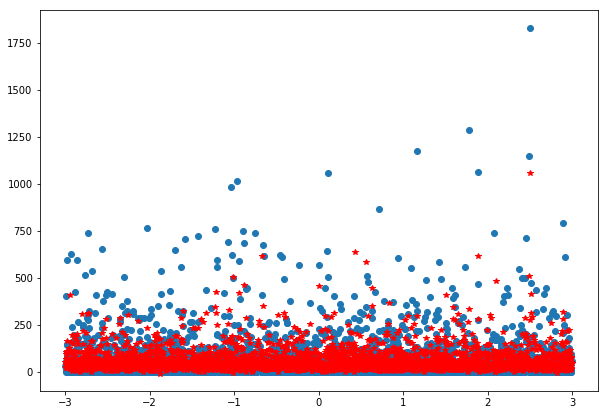

In [15]:
x = np.random.uniform(-3,3,size=len(Y))
y_pre = clf.predict(X)
plt.figure(figsize=[10, 7])
plt.scatter(x,Y)
plt.plot(x,y_pre,"r*")
plt.show()

In [16]:
data["credit_reg"] =data["creditlevelasbuyer"]

In [17]:
X_P = data[["gaodescore","tencentscore","huabeiamount","huabeibalance"]][data["creditlevelasbuyer"].isnull()]
data["credit_reg"][data["creditlevelasbuyer"].isnull()] = clf.predict(X_P)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\p

In [18]:
## Using poly regression to fill na value in credit score
# model = Pipeline(
# [
#     ('poly',PolynomialFeatures(degree=3)),
#     ('linear',LinearRegression(fit_intercept=False))
# ]
# )
# model =model.fit(X,Y)


In [19]:
# model.score(X,Y)

In [20]:
# x = np.random.uniform(-3,3,size=len(Y))
# y_pre = model.predict(X)
# plt.figure(figsize=[10, 7])
# plt.scatter(x,Y)
# plt.plot(x,y_pre,"r:*")
# plt.show()

<a id="2"></a>
## 2Logit Regression

<a id="2.1"> </a>
### 2.1 Default vs Credit score

In [21]:
## drop null value records in default since it is the target variables
data_default = data[data['default'].notnull()]
data_default.shape

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\generic.py:1143: RuntimeWarning: divide by zero encountered in invert
  arr = operator.inv(com._values_from_object(self))
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\151

(2205, 50)

In [22]:
## Fill the void with mean
data_default['creditlevelasbuyer'][data_default['creditlevelasbuyer'].isnull()] = data_default['creditlevelasbuyer'].mean()
## Fill the void with other related variables
# data_default.corr()['creditlevelasbuyer']

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:336: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:952: RuntimeW

In [23]:
## Defin X and Y
Y = data_default['default']
X = np.array(data_default['creditlevelasbuyer']).reshape(-1,1)

In [24]:
Y = Y.astype('int')

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:701: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(arr).all():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)


In [25]:
lg = LogisticRegression()
lg.fit(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:291: RuntimeWarning: divide by zero encountered in subtract
  imask = np.cumsum(mask) - 1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\svm\base.py:902: RuntimeWarning: divide by zero encountered in multiply
  intercept_ = intercept_scaling * raw_coef_[:, -1]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
lg.score(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: RuntimeWarning: divide by zero encountered in greater
  indices = (scores > 0).astype(np.int)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:181: RuntimeWarning: divide by zero en

0.5804988662131519

In [27]:
lg.coef_

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:841: RuntimeWarning: divide by zero encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in not_equal
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in absolute
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:850: RuntimeWarning: divide by zero encountered in double_scalars
  (min_val < 0.0001 or max_val/min_val > 1000.)):
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:924: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(x):


array([[-0.00035496]])

In [28]:
X_sort = data_default['creditlevelasbuyer'].sort_values()
X_sort = np.array(X_sort).reshape(-1,1)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


In [29]:
P_1 = lg.predict_proba(X_sort)
P_1

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:339: RuntimeWarning: divide by zero encountered in multiply
  prob *= -1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: divide by zero encountered in exp
  np.exp(prob, prob)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:341: RuntimeWarning: divide by zero encountered in add
  prob += 1
C:\Users\15161\A

array([[0.57456157, 0.42543843],
       [0.57456157, 0.42543843],
       [0.57456157, 0.42543843],
       ...,
       [0.66987661, 0.33012339],
       [0.68046329, 0.31953671],
       [0.7211283 , 0.2788717 ]])

In [30]:
odds =[]
for i in range(len(P_1)):
    odds.append(P_1[i][1]/P_1[i][0])
odds

C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


[0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081681335,
 0.7404575081

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:356: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(figsize).all():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:134: RuntimeWarning: divide by zero encountered in subtract
  fig_tops, fig_bottoms = (top - cell_hs).reshape((-1, 2)).T
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:135: RuntimeWarning: divide by zero encountered in add
  fig_lefts, fig_rights = (left + cell_ws).reshape((-1, 2)).T
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: divide by zero encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: divide by zero encountered in

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2502: RuntimeWarning: divide by zero encountered in double_scalars
  length = ((ends[1][1] - ends[0][1]) / self.axes.figure.dpi) * 72.0
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2507: RuntimeWarning: divide by zero encountered in double_scalars
  return int(np.floor(length / size))
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2507: RuntimeWarning: divide by zero encountered in floor
  return int(np.floor(length / size))
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:191: RuntimeWarning: divide by zero encountered in greater
  return rgbaArr[:,:3].dot((.299, .587, .114)) > .5
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:180: RuntimeWarning: divide by zero encountered in equal
  if ticksLight.size and (ticksLight == ticksLight[0]).all():
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:434: RuntimeWarning: divi

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\ticker.py:699: RuntimeWarning: divide by zero encountered in double_scalars
  if (abs_max - abs_min) / 10 ** oom <= 1e-2:
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\ticker.py:709: RuntimeWarning: divide by zero encountered in double_scalars
  if abs_max // 10 ** oom >= 10**n
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: RuntimeWarning: divide by zero encountered in multiply
  return getattr(obj, method)(*args, **kwds)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: RuntimeWarning: divide by zero encountered in true_divide
  return getattr(obj, method)(*args, **kwds)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2225: RuntimeWarning: divide by zero encountered in double_scalars
  ptp = transinv.transform_point((pix[0], pix[1] + perturb))
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2226: RuntimeWarning: divide by zero encountered in double

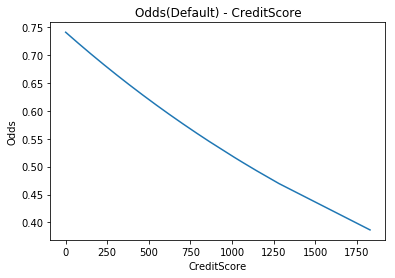

In [31]:
plt.plot(X_sort,odds)
plt.ylabel("Odds")
plt.xlabel("CreditScore")
plt.title("Odds(Default) - CreditScore")
plt.show()

In [32]:
data_default['intercept'] = 1.0

C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
# model = sm.GLM.from_formula("default ~ creditlevelasbuyer", family = sm.families.Binomial(), data = data_default)
model = sm.Logit(data_default['default'].astype('int'),data_default[['creditlevelasbuyer','intercept']])
result = model.fit()
result.summary()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:701: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(arr).all():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pand

C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: RuntimeWarning: divide by zero encountered in negative
  Hinv = np.linalg.inv(-retvals['Hessian']) / nobs
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: RuntimeWarning: divide by zero encountered in true_divide
  Hinv = np.linalg.inv(-retvals['Hessian']) / nobs
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:562: RuntimeWarning: divide by zero encountered in subtract
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:562: RuntimeWarning: divide by zero encountered in absolute
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:566: RuntimeWarning: divide by zero encountered in reduce
  xbar = numpy.add.reduce(sim[:-1], 0) / N
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimi

Optimization terminated successfully.
         Current function value: 0.679934
         Iterations 4


C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in absolute
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:475: RuntimeWarning: divide by zero encountered in multiply
  H = -1 * self.hessian(xopt)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:477: RuntimeWarning: divide by zero encountered in isfinite
  if np.all(np.isfinite(H)):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:483: RuntimeWarning: divide by zero encountered in true_divide
  Hinv = eigvecs.dot(np.diag(1.0 / eigvals)).dot(eigvecs.T)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:484: RuntimeWarning: divide by zero encountered in add
  Hinv = np.asfortranarray((Hinv + Hinv.T) / 2.0)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:484: RuntimeWarning: divide by zero encountered in true_divide
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2205
Model:                          Logit   Df Residuals:                     2203
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:               0.0002892
Time:                        11:19:47   Log-Likelihood:                -1499.3
converged:                       True   LL-Null:                       -1499.7
                                        LLR p-value:                    0.3517
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
creditlevelasbuyer    -0.0004      0.000     -0.922      0.357      -0.001       0.000
intercept             -0.3007      0.050     -5.969      0.000      -0.399      -0.202
======================================================================================
"""

In [34]:
model = sm.Logit(data_default['default'].astype('int'),data_default[['gaodescore','intercept']])
result = model.fit()
result.summary()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:701: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(arr).all():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

Optimization terminated successfully.
         Current function value: 0.677530
         Iterations 4


C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in absolute
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:475: RuntimeWarning: divide by zero encountered in multiply
  H = -1 * self.hessian(xopt)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:477: RuntimeWarning: divide by zero encountered in isfinite
  if np.all(np.isfinite(H)):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:483: RuntimeWarning: divide by zero encountered in true_divide
  Hinv = eigvecs.dot(np.diag(1.0 / eigvals)).dot(eigvecs.T)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:484: RuntimeWarning: divide by zero encountered in add

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2205
Model:                          Logit   Df Residuals:                     2203
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                0.003823
Time:                        11:19:47   Log-Likelihood:                -1494.0
converged:                       True   LL-Null:                       -1499.7
                                        LLR p-value:                 0.0007086
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gaodescore     1.9983      0.593      3.369      0.001       0.836       3.161
intercept     -0.7116      0.123     -5.787      0.000      -0.953      -0.471
==============================================================================
"""

In [35]:
model = sm.Logit(data_default['default'].astype('int'),data_default[['tencentscore','intercept']])
result = model.fit()
result.summary()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:701: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(arr).all():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

Optimization terminated successfully.
         Current function value: 0.677614
         Iterations 4


C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:598: RuntimeWarning: divide by zero encountered in add
  xcc = (1 - psi) * xbar + psi * sim[-1]
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in absolute
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:475: RuntimeWarning: divide by zero encountered in multiply
  H = -1 * self.hessian(xopt)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:477: RuntimeWarning: divide by zero encountered in isfinite
  if np.all(np.isfinite(H)):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:483: RuntimeWarning: divide by zero encountered in true_divide
  Hinv = eigvecs.

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2205
Model:                          Logit   Df Residuals:                     2203
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                0.003700
Time:                        11:19:48   Log-Likelihood:                -1494.1
converged:                       True   LL-Null:                       -1499.7
                                        LLR p-value:                 0.0008648
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
tencentscore     0.0092      0.003      3.313      0.001       0.004       0.015
intercept       -0.8370      0.161     -5.196      0.000      -1.153      -0.521
================================================================================
"""

In [36]:
model = sm.Logit(data_default['default'].astype('int'),data_default[['gaodescore','intercept']])
result = model.fit()
result.summary()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:701: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(arr).all():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

Optimization terminated successfully.
         Current function value: 0.677530
         Iterations 4


C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in absolute
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:475: RuntimeWarning: divide by zero encountered in multiply
  H = -1 * self.hessian(xopt)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:477: RuntimeWarning: divide by zero encountered in isfinite
  if np.all(np.isfinite(H)):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:483: RuntimeWarning: divide by zero encountered in true_divide
  Hinv = eigvecs.dot(np.diag(1.0 / eigvals)).dot(eigvecs.T)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:484: RuntimeWarning: divide by zero encountered in add

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2205
Model:                          Logit   Df Residuals:                     2203
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                0.003823
Time:                        11:19:48   Log-Likelihood:                -1494.0
converged:                       True   LL-Null:                       -1499.7
                                        LLR p-value:                 0.0007086
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gaodescore     1.9983      0.593      3.369      0.001       0.836       3.161
intercept     -0.7116      0.123     -5.787      0.000      -0.953      -0.471
==============================================================================
"""

<a id="2.2"> </a>
### 2.2 deal vs Credit score

In [37]:
## Fill na
data['credit_score'] = data['creditlevelasbuyer']
data['credit_score'][data['credit_score'].isnull()] = data["credit_score"].mean()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:336: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Us

In [38]:
Y2 = data["deal"]
X2 = np.array(data["credit_reg"]).reshape(-1,1)

In [39]:
data['intercept'] = 1.0

In [40]:
model = sm.Logit(data['deal'].astype('int'),data[['credit_reg','intercept']])
result = model.fit()
result.summary()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\p

Optimization terminated successfully.
         Current function value: 0.677432
         Iterations 5


C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:598: RuntimeWarning: divide by zero encountered in multiply
  xcc = (1 - psi) * xbar + psi * sim[-1]
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:598: RuntimeWarning: divide by zero encountered in add
  xcc = (1 - psi) * xbar + psi * sim[-1]
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in absolute
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:475: RuntimeWarning: divide by zero encountered in multiply
  H = -1 * self.hessian(xopt)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:477: RuntimeWarning: divide by zero encountered in isfinite
  if np

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   deal   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                 0.01287
Time:                        11:19:49   Log-Likelihood:                -3387.2
converged:                       True   LL-Null:                       -3431.3
                                        LLR p-value:                 5.578e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
credit_reg     0.0030      0.000      8.483      0.000       0.002       0.004
intercept     -0.3781      0.033    -11.529      0.000      -0.442      -0.314
==============================================================================
"""

In [41]:
model = sm.Logit(data['deal'].astype('int'),data[['tencentscore','intercept']])
result = model.fit()
result.summary()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

Optimization terminated successfully.
         Current function value: 0.663009
         Iterations 5


C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:598: RuntimeWarning: divide by zero encountered in multiply
  xcc = (1 - psi) * xbar + psi * sim[-1]
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:598: RuntimeWarning: divide by zero encountered in add
  xcc = (1 - psi) * xbar + psi * sim[-1]
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in absolute
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:475: RuntimeWarning: divide by zero encountered in multiply
  H = -1 * self.hessian(xopt)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:477: RuntimeWarning: divide by zero encountered in isfinite
  if np

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   deal   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                 0.03389
Time:                        11:19:50   Log-Likelihood:                -3315.0
converged:                       True   LL-Null:                       -3431.3
                                        LLR p-value:                 1.659e-52
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
tencentscore    -0.0317      0.002    -14.639      0.000      -0.036      -0.027
intercept        1.6148      0.130     12.467      0.000       1.361       1.869
================================================================================
"""

In [42]:
model = sm.Logit(data['deal'].astype('int'),data[['gaodescore','intercept']])
result = model.fit()
result.summary()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

Optimization terminated successfully.
         Current function value: 0.680472
         Iterations 5


C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:598: RuntimeWarning: divide by zero encountered in multiply
  xcc = (1 - psi) * xbar + psi * sim[-1]
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:598: RuntimeWarning: divide by zero encountered in add
  xcc = (1 - psi) * xbar + psi * sim[-1]
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in absolute
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:475: RuntimeWarning: divide by zero encountered in multiply
  H = -1 * self.hessian(xopt)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:477: RuntimeWarning: divide by zero encountered in isfinite
  if np

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   deal   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                0.008439
Time:                        11:19:50   Log-Likelihood:                -3402.4
converged:                       True   LL-Null:                       -3431.3
                                        LLR p-value:                 2.742e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gaodescore    -2.9408      0.399     -7.377      0.000      -3.722      -2.159
intercept      0.3542      0.084      4.205      0.000       0.189       0.519
==============================================================================
"""

In [43]:
lg2 = LogisticRegression()
lg2.fit(X2,Y2)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:291: RuntimeWarning: divide by zero encountered in subtract
  imask = np.cumsum(mask) - 1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\svm\base.py:902: RuntimeWarning: divide by zero encountered in multiply
  intercept_ = intercept_scaling * raw_coef_[:, -1]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
lg2.score(X2,Y2)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: RuntimeWarning: divide by zero encountered in greater
  indices = (scores > 0).astype(np.int)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:181: RuntimeWarning: divide by zero en

0.5794

In [45]:
lg2.coef_

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:841: RuntimeWarning: divide by zero encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in not_equal
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in absolute
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:850: RuntimeWarning: divide by zero encountered in double_scalars
  (min_val < 0.0001 or max_val/min_val > 1000.)):
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:924: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(x):


array([[0.00304548]])

In [46]:
X2_sort = data["credit_reg"].sort_values()
## standardlize
X2_plot = (X2_sort-X2_sort.min())/(X2_sort.max()-X2_sort.min())
X2_sort = np.array(X2_sort).reshape(-1,1)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
P_2 = lg2.predict_proba(X2_sort)
P_2

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:339: RuntimeWarning: divide by zero encountered in multiply
  prob *= -1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: divide by zero encountered in exp
  np.exp(prob, prob)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:341: RuntimeWarning: divide by zero encountered in add
  prob += 1
C:\Users\15161\A

array([[0.5986062 , 0.4013938 ],
       [0.5968189 , 0.4031811 ],
       [0.59452371, 0.40547629],
       ...,
       [0.03902316, 0.96097684],
       [0.02847996, 0.97152004],
       [0.0055107 , 0.9944893 ]])

In [48]:
odds =[]
for i in range(len(P_2)):
    odds.append(P_2[i][1]/P_2[i][0])
odds

C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


[0.6705473408795984,
 0.6755501471172678,
 0.682018707951114,
 0.683007067118192,
 0.6840446548405008,
 0.6843731741442235,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.6854439871294051,
 0.685443987129

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:356: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(figsize).all():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:134: RuntimeWarning: divide by zero encountered in subtract
  fig_tops, fig_bottoms = (top - cell_hs).reshape((-1, 2)).T
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:135: RuntimeWarning: divide by zero encountered in add
  fig_lefts, fig_rights = (left + cell_ws).reshape((-1, 2)).T
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: divide by zero encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: divide by zero encountered in

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2502: RuntimeWarning: divide by zero encountered in double_scalars
  length = ((ends[1][1] - ends[0][1]) / self.axes.figure.dpi) * 72.0
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2507: RuntimeWarning: divide by zero encountered in double_scalars
  return int(np.floor(length / size))
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2507: RuntimeWarning: divide by zero encountered in floor
  return int(np.floor(length / size))
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:191: RuntimeWarning: divide by zero encountered in greater
  return rgbaArr[:,:3].dot((.299, .587, .114)) > .5
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:180: RuntimeWarning: divide by zero encountered in equal
  if ticksLight.size and (ticksLight == ticksLight[0]).all():
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:434: RuntimeWarning: divi

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2225: RuntimeWarning: divide by zero encountered in double_scalars
  ptp = transinv.transform_point((pix[0], pix[1] + perturb))
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2226: RuntimeWarning: divide by zero encountered in double_scalars
  dy = abs(ptp[1] - where)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\text.py:376: RuntimeWarning: divide by zero encountered in double_scalars
  offsetx = (xmin + width)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\text.py:387: RuntimeWarning: divide by zero encountered in double_scalars
  offsety = ymin + height - baseline / 2.0
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\axis.py:2289: RuntimeWarning: divide by zero encountered in double_scalars
  (left - self.labelpad * self.figure.dpi / 72.0, y)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\text.py:395: RuntimeWarning: divide by zero encountered in double_scalars
  offsetx = (xmin1

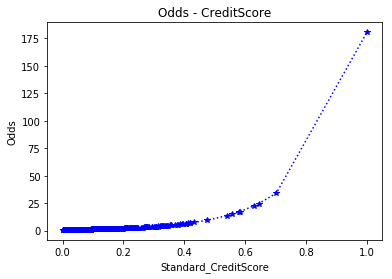

In [49]:
plt.plot(X2_plot,odds,"b:*")
plt.ylabel("Odds")
plt.xlabel("Standard_CreditScore")
plt.title("Odds - CreditScore")
plt.show()

<a id="2.3"> </a>
### 2.3 Deal vs Contact

In [50]:
## See if there is null value in column contact

data["highcontact"].value_counts(dropna=False)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


0    2539
1    2461
Name: highcontact, dtype: int64

In [51]:
X3 = np.array(data["highcontact"]).reshape(-1,1)
Y3 = data["deal"]

In [52]:
model = sm.Logit(data['deal'].astype('int'),data[['highcontact','intercept']])
result = model.fit()
result.summary()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

Optimization terminated successfully.
         Current function value: 0.685395
         Iterations 4


C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:598: RuntimeWarning: divide by zero encountered in multiply
  xcc = (1 - psi) * xbar + psi * sim[-1]
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:598: RuntimeWarning: divide by zero encountered in add
  xcc = (1 - psi) * xbar + psi * sim[-1]
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in absolute
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:475: RuntimeWarning: divide by zero encountered in multiply
  H = -1 * self.hessian(xopt)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:477: RuntimeWarning: divide by zero encountered in isfinite
  if np

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   deal   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                0.001265
Time:                        11:25:02   Log-Likelihood:                -3427.0
converged:                       True   LL-Null:                       -3431.3
                                        LLR p-value:                  0.003215
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
highcontact     0.1679      0.057      2.945      0.003       0.056       0.280
intercept      -0.3185      0.040     -7.925      0.000      -0.397      -0.240
===============================================================================
"""

In [53]:
lg3 = LogisticRegression()
lg3.fit(X3,Y3)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:291: RuntimeWarning: divide by zero encountered in subtract
  imask = np.cumsum(mask) - 1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\svm\base.py:902: RuntimeWarning: divide by zero encountered in multiply
  intercept_ = intercept_scaling * raw_coef_[:, -1]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
lg3.score(X3,Y3)

C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: RuntimeWarning: divide by zero encountered in greater
  indices = (scores > 0).astype(np.int)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:181: RuntimeWarning: divide by zero encountered in equal
  score = y_true == y_pred
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: divide by zero encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: divide by zero encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.5586

In [55]:
lg3.coef_

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:841: RuntimeWarning: divide by zero encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in not_equal
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in absolute
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:850: RuntimeWarning: divide by zero encountered in double_scalars
  (min_val < 0.0001 or max_val/min_val > 1000.)):
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:924: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(x):


array([[0.16685299]])

In [56]:
P_3 = lg3.predict_proba(X3)
P_3

C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:339: RuntimeWarning: divide by zero encountered in multiply
  prob *= -1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: divide by zero encountered in exp
  np.exp(prob, prob)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:341: RuntimeWarning: divide by zero encountered in add
  prob += 1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:342: RuntimeWarning: divide by zero encountered in reciprocal
  np.reciprocal(prob, prob)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:344: RuntimeWarning: divide by zero encountered in subtract
  return np.vstack([1 - prob, prob]).T
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:8

array([[0.5787771 , 0.4212229 ],
       [0.53765415, 0.46234585],
       [0.53765415, 0.46234585],
       ...,
       [0.53765415, 0.46234585],
       [0.53765415, 0.46234585],
       [0.53765415, 0.46234585]])

In [57]:
odds =[]
for i in range(len(P_3)):
    odds.append(P_3[i][1]/P_3[i][0])
odds

C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


[0.7277808710136152,
 0.8599317221576445,
 0.8599317221576445,
 0.7277808710136152,
 0.8599317221576445,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.8599317221576445,
 0.7277808710136152,
 0.8599317221576445,
 0.7277808710136152,
 0.8599317221576445,
 0.8599317221576445,
 0.7277808710136152,
 0.8599317221576445,
 0.8599317221576445,
 0.7277808710136152,
 0.8599317221576445,
 0.8599317221576445,
 0.7277808710136152,
 0.8599317221576445,
 0.8599317221576445,
 0.8599317221576445,
 0.8599317221576445,
 0.8599317221576445,
 0.8599317221576445,
 0.8599317221576445,
 0.7277808710136152,
 0.7277808710136152,
 0.8599317221576445,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.8599317221576445,
 0.8599317221576445,
 0.7277808710136152,
 0.7277808710136152,
 0.8599317221576445,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710136152,
 0.7277808710

In [58]:
pd.Series(odds).describe()

C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1217: RuntimeWarning: divide by zero encountered in greater_equal
  if not is_numeric_dtype(percentiles) or not np.all(percentiles >= 0) \
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: divide by zero encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1218: RuntimeWarning: divide by zero encountered in less_equal
  or not np.all(percentiles <= 1):
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1221: RuntimeWarning: divide by zero encountered in multiply
  percentiles = 100 * percentiles
C:\Users\15161\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1222: RuntimeWarning: divide by zero 

count    5000.000000
mean        0.792826
std         0.066074
min         0.727781
25%         0.727781
50%         0.727781
75%         0.859932
max         0.859932
dtype: float64

In [59]:
X_contact = [0,1]
Y_Odds = [odds[0],odds[1]]

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:356: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(figsize).all():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:134: RuntimeWarning: divide by zero encountered in subtract
  fig_tops, fig_bottoms = (top - cell_hs).reshape((-1, 2)).T
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\gridspec.py:135: RuntimeWarning: divide by zero encountered in add
  fig_lefts, fig_rights = (left + cell_ws).reshape((-1, 2)).T
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: divide by zero encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: divide by zero encountered in

C:\Users\15161\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:191: RuntimeWarning: divide by zero encountered in greater
  return rgbaArr[:,:3].dot((.299, .587, .114)) > .5
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:180: RuntimeWarning: divide by zero encountered in equal
  if ticksLight.size and (ticksLight == ticksLight[0]).all():
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:434: RuntimeWarning: divide by zero encountered in subtract
  return points[1] - points[0]
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:907: RuntimeWarning: divide by zero encountered in isfinite
  if not all(np.isfinite(_) for _ in (w, h)):
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:917: RuntimeWarning: divide by zero encountered in double_scalars
  canvasw = w * dpival
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\figure.py:918: RuntimeWarning: divide by zero encountered in double_scalars
  ca

C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:759: RuntimeWarning: divide by zero encountered in maximum
  x0 = np.maximum(bbox1.xmin, bbox2.xmin)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:760: RuntimeWarning: divide by zero encountered in minimum
  x1 = np.minimum(bbox1.xmax, bbox2.xmax)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:761: RuntimeWarning: divide by zero encountered in maximum
  y0 = np.maximum(bbox1.ymin, bbox2.ymin)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:762: RuntimeWarning: divide by zero encountered in minimum
  y1 = np.minimum(bbox1.ymax, bbox2.ymax)
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\transforms.py:709: RuntimeWarning: divide by zero encountered in add
  return Bbox(points + [[-p, -p], [p, p]])
C:\Users\15161\Anaconda3\lib\site-packages\matplotlib\tight_bbox.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  w1, h1 = fig.bbox.width

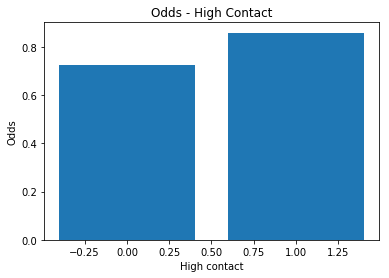

In [60]:
## not useful,only value < 1 means with only high contact, no matter what its value is it will predict it as not a fail deal
plt.bar(X_contact, Y_Odds)
plt.ylabel("Odds")
plt.xlabel("High contact")
plt.title("Odds - High Contact")
plt.show()

<a id="2.4"> </a>
## 2.4 Logist regression with multiple variables

In [61]:
data.corr()["deal"].sort_values()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\frame.py:6507: RuntimeWarning: divide by zero encountered in isfinite
  correl = libalgos.nancorr(_ensure_float64(mat), minp=min_periods)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\series.py:2468: RuntimeWarning: divide by zero encountered in invert
  good = ~bad
C:\Users\151

tencentscore         -0.213409
gaodescore           -0.105925
instalments_amount   -0.096088
id                   -0.071709
apply_request_sum    -0.065933
apply_reject_sum     -0.062687
age                  -0.056150
highcontact_False    -0.041664
loan_offer_sum       -0.032331
areaid               -0.031990
provincecode         -0.031802
repay_fail_sum       -0.019168
instalments_num      -0.004299
taobaodealno          0.002084
numbercontacttotal    0.005232
numbercontact20s      0.018830
numbercontact         0.022857
default               0.025203
delaydate_max         0.025641
max_default_days      0.035355
highcontact20s        0.035964
yuebaobalance         0.040148
alipaybalance         0.040259
highcontact_True      0.041664
highcontact           0.041664
birthday              0.056075
gender                0.076812
credit_score          0.116620
credit_reg            0.128184
creditlevelasbuyer    0.129605
nominalrates          0.131284
uid                   0.215884
huabeiba

In [48]:
## take variables: tencent score,gaodescore,apptime,huabeiamount,huabeibalance,nominalrates,credit_score

In [62]:
data["nominalrates"][data["nominalrates"].isnull()] = data["nominalrates"].mean()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:220: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\15161\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\internals.py:3377: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:336: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\15161\Anaconda3\lib\site-pac

In [63]:
Y = data["deal"]
X = data[["apptimes","huabeiamount","huabeibalance","nominalrates","credit_reg","tencentscore","gaodescore"]]


C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

In [70]:
model = sm.Logit(data['deal'].astype('int'),data[["apptimes","huabeiamount","huabeibalance","nominalrates","credit_reg","tencentscore","gaodescore",'intercept']])
result = model.fit()
result.summary()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1722: RuntimeWarning: divide by zero encountered in subtract
  q = 2*self.endog - 1
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in multiply
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:440: RuntimeWarning: divide by zero encountered in double_scalars
  return -self.loglike(params, *args) / nobs
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: RuntimeWarning: divide by zero encountered in negative
  Hinv = np.linalg.inv(-retvals['Hessian']) / nobs
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: RuntimeWarn

Optimization terminated successfully.
         Current function value: 0.582864
         Iterations 7


C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:475: RuntimeWarning: divide by zero encountered in multiply
  H = -1 * self.hessian(xopt)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:477: RuntimeWarning: divide by zero encountered in isfinite
  if np.all(np.isfinite(H)):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:483: RuntimeWarning: divide by zero encountered in true_divide
  Hinv = eigvecs.dot(np.diag(1.0 / eigvals)).dot(eigvecs.T)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:484: RuntimeWarning: divide by zero encountered in add
  Hinv = np.asfortranarray((Hinv + Hinv.T) / 2.0)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:484: RuntimeWarning: divide by zero encountered in true_divide
  Hinv = np.asfortranarray((Hinv + Hinv.T) / 2.0)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:451: RuntimeWarning: divide by zero encountered in negative
  retu

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   deal   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4992
Method:                           MLE   Df Model:                            7
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                  0.1507
Time:                        11:36:33   Log-Likelihood:                -2914.3
converged:                       True   LL-Null:                       -3431.3
                                        LLR p-value:                5.423e-219
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
apptimes          1.4052      0.097     14.489      0.000       1.215       1.595
huabeiamount   9.185e-05   2.49e-05      3.688      0.000     4.3e-05       0.000
huabeibalance     0.0004   4.56e-05      9.587      0.000       0.000       0.001
nominalrates      3.3752      0.365      9.243      0.000       2.660       4.091
credit_reg    -6.987e-05      0.000     -0.169      0.866      -0.001       0.001
tencentscore     -0.0257      0.002    -10.831      0.000      -0.030      -0.021
gaodescore       -1.1375      0.437     -2.604      0.009      -1.994      -0.281
intercept        -1.3226      0.224     -5.910      0.000      -1.761      -0.884
=================================================================================
"""

In [64]:
lg4 = LogisticRegression()
lg4.fit(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:291: RuntimeWarning: divide by zero encountered in subtract
  imask = np.cumsum(mask) - 1
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\svm\base.py:902: RuntimeWarning: divide by zero encountered in multiply


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
lg4.score(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:46: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: divide by zero encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\utils\validation.py:41: RuntimeWarning: divide by zero encountered in isfinite
  if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:308: RuntimeWarning: divide by zero encountered in add
  dense_output=True) + self.intercept_
C:\Users\15161\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: RuntimeWarning: divide by zero encountered in greater
  indices = (scores > 0).astype(np.int)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:285: RuntimeWarning: divide by zero en

0.7062

In [66]:
lg4.coef_[0]

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:841: RuntimeWarning: divide by zero encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in not_equal
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:844: RuntimeWarning: divide by zero encountered in absolute
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: divide by zero encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\arrayprint.py:924: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(x):


array([ 1.05054028e+00,  7.28775462e-05,  4.35982443e-04,  1.61687828e-01,
       -1.16837810e-04, -3.16052795e-02, -1.19823742e-02])

In [68]:
index = ["apptimes","huabeiamount","huabeibalance","nominalrates","credit_score","tencentscore","gaodescore"]

In [75]:
model = sm.Logit(data['deal'].astype('int'),data[["apptimes","huabeiamount","huabeibalance","nominalrates","gender","tencentscore","gaodescore",'intercept']])
result = model.fit()
result.summary()

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

Optimization terminated successfully.
         Current function value: 0.579898
         Iterations 7


C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:598: RuntimeWarning: divide by zero encountered in multiply
  xcc = (1 - psi) * xbar + psi * sim[-1]
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:598: RuntimeWarning: divide by zero encountered in add
  xcc = (1 - psi) * xbar + psi * sim[-1]
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: divide by zero encountered in absolute
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:475: RuntimeWarning: divide by zero encountered in multiply
  H = -1 * self.hessian(xopt)
C:\Users\15161\Anaconda3\lib\site-packages\statsmodels\base\model.py:477: RuntimeWarning: divide by zero encountered in isfinite
  if np

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   deal   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4992
Method:                           MLE   Df Model:                            7
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                  0.1550
Time:                        11:40:59   Log-Likelihood:                -2899.5
converged:                       True   LL-Null:                       -3431.3
                                        LLR p-value:                2.113e-225
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
apptimes          1.4166      0.097     14.538      0.000       1.226       1.608
huabeiamount   8.602e-05   2.29e-05      3.748      0.000     4.1e-05       0.000
huabeibalance     0.0004   4.58e-05      9.719      0.000       0.000       0.001
nominalrates      3.3805      0.366      9.226      0.000       2.662       4.099
gender            0.4827      0.088      5.462      0.000       0.309       0.656
tencentscore     -0.0261      0.002    -11.002      0.000      -0.031      -0.021
gaodescore       -1.0601      0.438     -2.418      0.016      -1.919      -0.201
intercept        -1.4013      0.224     -6.264      0.000      -1.840      -0.963
=================================================================================
"""

In [71]:
Y = data["deal"]
X = data[["apptimes","huabeibalance","huabeibalance","nominalrates","tencentscore","gaodescore","gender"]]
lg = LogisticRegression()
lg.fit(X,Y)
lg.score(X,Y)

C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:1324: RuntimeWarning: divide by zero encountered in equal
  mask = check == -1
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2474: RuntimeWarning: divide by zero encountered in less
  mask = indices < 0
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in greater_equal
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in less
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\site-packages\pandas\core\indexing.py:2478: RuntimeWarning: divide by zero encountered in bitwise_or
  mask = (indices >= n) | (indices < 0)
C:\Users\15161\Anaconda3\lib\si

0.714

In [ ]:
# Content
* [1. Data Summary](#1)
* [2. Logit Regression for one variable](#2)
   * [2.1 Default vs Credit score](#2.1)
   * [2.2 Deal vs Credit score](#2.2)
   * [2.3 Deal vs Contact](#2.3)
   * [2.4 logistic regression with multiple variables](#2.4)

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf

<a id="1"></a>
## 1.Data Summary

data = pd.read_csv(r"C:\Users\15161\Jupyter_git\Fin-Tech\Assignment1\Input\MDS6212 Week 1 Data.csv",encoding="gbk")
data.head()

data.shape

data.info()

## Convert gender to 0/1
data["gender"][data["gender"]==False] = 0
data["gender"][data["gender"]==True] = 1

data["gender"].value_counts()

data.describe()

data = pd.get_dummies(data,columns=["highcontact"])
## Convert default to 0/1
data["default"][data["default"]==False] = 0
data["default"][data["default"]==True] = 1
data['highcontact'] = data["highcontact_True"]
data["default"] = data["default"].astype("float64")

data[["age","gender","instalments_amount","nominalrates","creditlevelasbuyer","tencentscore","gaodescore","highcontact","default","deal"]].describe()

data.corr()['creditlevelasbuyer'].sort_values()

data[["gaodescore","tencentscore","huabeiamount","huabeibalance","gender"]].describe()

clf = LinearRegression()
Y = data["creditlevelasbuyer"][data["creditlevelasbuyer"].notnull()]
X = data[["gaodescore","tencentscore","huabeiamount","huabeibalance"]][data["creditlevelasbuyer"].notnull()]
clf.fit(X,Y)

clf.score(X,Y)

x = np.random.uniform(-3,3,size=len(Y))
y_pre = clf.predict(X)
plt.figure(figsize=[10, 7])
plt.scatter(x,Y)
plt.plot(x,y_pre,"r*")
plt.show()

data["credit_reg"] =data["creditlevelasbuyer"]

X_P = data[["gaodescore","tencentscore","huabeiamount","huabeibalance"]][data["creditlevelasbuyer"].isnull()]
data["credit_reg"][data["creditlevelasbuyer"].isnull()] = clf.predict(X_P)

## Using poly regression to fill na value in credit score
# model = Pipeline(
# [
#     ('poly',PolynomialFeatures(degree=3)),
#     ('linear',LinearRegression(fit_intercept=False))
# ]
# )
# model =model.fit(X,Y)


# model.score(X,Y)

# x = np.random.uniform(-3,3,size=len(Y))
# y_pre = model.predict(X)
# plt.figure(figsize=[10, 7])
# plt.scatter(x,Y)
# plt.plot(x,y_pre,"r:*")
# plt.show()

<a id="2"></a>
## 2Logit Regression

<a id="2.1"> </a>
### 2.1 Default vs Credit score

## drop null value records in default since it is the target variables
data_default = data[data['default'].notnull()]
data_default.shape

## Fill the void with mean
data_default['creditlevelasbuyer'][data_default['creditlevelasbuyer'].isnull()] = data_default['creditlevelasbuyer'].mean()
## Fill the void with other related variables
# data_default.corr()['creditlevelasbuyer']

## Defin X and Y
Y = data_default['default']
X = np.array(data_default['creditlevelasbuyer']).reshape(-1,1)

Y = Y.astype('int')

lg = LogisticRegression()
lg.fit(X,Y)

lg.score(X,Y)

lg.coef_

X_sort = data_default['creditlevelasbuyer'].sort_values()
X_sort = np.array(X_sort).reshape(-1,1)

P_1 = lg.predict_proba(X_sort)
P_1

odds =[]
for i in range(len(P_1)):
    odds.append(P_1[i][1]/P_1[i][0])
odds

plt.plot(X_sort,odds)
plt.ylabel("Odds")
plt.xlabel("CreditScore")
plt.title("Odds(Default) - CreditScore")
plt.show()

data_default['intercept'] = 1.0

# model = sm.GLM.from_formula("default ~ creditlevelasbuyer", family = sm.families.Binomial(), data = data_default)
model = sm.Logit(data_default['default'].astype('int'),data_default[['creditlevelasbuyer','intercept']])
result = model.fit()
result.summary()

model = sm.Logit(data_default['default'].astype('int'),data_default[['gaodescore','intercept']])
result = model.fit()
result.summary()

model = sm.Logit(data_default['default'].astype('int'),data_default[['tencentscore','intercept']])
result = model.fit()
result.summary()

model = sm.Logit(data_default['default'].astype('int'),data_default[['gaodescore','intercept']])
result = model.fit()
result.summary()

<a id="2.2"> </a>
### 2.2 deal vs Credit score

## Fill na
data['credit_score'] = data['creditlevelasbuyer']
data['credit_score'][data['credit_score'].isnull()] = data["credit_score"].mean()

Y2 = data["deal"]
X2 = np.array(data["credit_reg"]).reshape(-1,1)

data['intercept'] = 1.0

model = sm.Logit(data['deal'].astype('int'),data[['credit_reg','intercept']])
result = model.fit()
result.summary()

model = sm.Logit(data['deal'].astype('int'),data[['tencentscore','intercept']])
result = model.fit()
result.summary()

model = sm.Logit(data['deal'].astype('int'),data[['gaodescore','intercept']])
result = model.fit()
result.summary()

lg2 = LogisticRegression()
lg2.fit(X2,Y2)

lg2.score(X2,Y2)

lg2.coef_

X2_sort = data["credit_reg"].sort_values()
## standardlize
X2_plot = (X2_sort-X2_sort.min())/(X2_sort.max()-X2_sort.min())
X2_sort = np.array(X2_sort).reshape(-1,1)

P_2 = lg2.predict_proba(X2_sort)
P_2

odds =[]
for i in range(len(P_2)):
    odds.append(P_2[i][1]/P_2[i][0])
odds

plt.plot(X2_plot,odds,"b:*")
plt.ylabel("Odds")
plt.xlabel("Standard_CreditScore")
plt.title("Odds - CreditScore")
plt.show()



<a id="2.3"> </a>
### 2.3 Deal vs Contact

## See if there is null value in column contact

data["highcontact"].value_counts(dropna=False)

X3 = np.array(data["highcontact"]).reshape(-1,1)
Y3 = data["deal"]

model = sm.Logit(data['deal'].astype('int'),data[['highcontact','intercept']])
result = model.fit()
result.summary()

lg3 = LogisticRegression()
lg3.fit(X3,Y3)

lg3.score(X3,Y3)

lg3.coef_

P_3 = lg3.predict_proba(X3)
P_3

odds =[]
for i in range(len(P_3)):
    odds.append(P_3[i][1]/P_3[i][0])
odds

pd.Series(odds).describe()

X_contact = [0,1]
Y_Odds = [odds[0],odds[1]]

## not useful,only value < 1 means with only high contact, no matter what its value is it will predict it as not a fail deal
plt.bar(X_contact, Y_Odds)
plt.ylabel("Odds")
plt.xlabel("High contact")
plt.title("Odds - High Contact")
plt.show()

<a id="2.4"> </a>
## 2.4 Logist regression with multiple variables

data.corr()["deal"].sort_values()

## take variables: tencent score,gaodescore,apptime,huabeiamount,huabeibalance,nominalrates,credit_score

data["nominalrates"][data["nominalrates"].isnull()] = data["nominalrates"].mean()

Y = data["deal"]
X = data[["apptimes","huabeiamount","huabeibalance","nominalrates","credit_reg","tencentscore","gaodescore"]]


model = sm.Logit(data['deal'].astype('int'),data[["apptimes","huabeiamount","huabeibalance","nominalrates","credit_reg","tencentscore","gaodescore",'intercept']])
result = model.fit()
result.summary()

lg4 = LogisticRegression()
lg4.fit(X,Y)

lg4.score(X,Y)

lg4.coef_[0]

index = ["apptimes","huabeiamount","huabeibalance","nominalrates","credit_score","tencentscore","gaodescore"]

model = sm.Logit(data['deal'].astype('int'),data[["apptimes","huabeiamount","huabeibalance","nominalrates","gender","tencentscore","gaodescore",'intercept']])
result = model.fit()
result.summary()

Y = data["deal"]
X = data[["apptimes","huabeibalance","huabeibalance","nominalrates","tencentscore","gaodescore","gender"]]
lg = LogisticRegression()
lg.fit(X,Y)
lg.score(X,Y)

